<a href="https://colab.research.google.com/github/XtopherQJ/Genomica_evolutiva/blob/main/Tarea_SN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

## 1 . Absolute, relative and marginal fitness

Los genotipos B$_1$B$_1$ y B$_1$B$_2$ producen, en promedio, 33 descendientes cada uno, mientras que el B$_2$B$_2$ produce 24 descendientes en promedio. Calculamos la aptitud relativa de la siguiente manera:



In [ ]:
# Define el número de descendientes por genotipo (como un vector)
a <- c(B1B1 = 33, B1B2 = 33, B2B2 = 24)

# Encuentra el fitness máximo
max_fit <- max(a)
print(paste0("El fitness máximo es ", max_fit))

# Determina el fitness relativo
rel_fit <- a/max_fit
print(paste0("El fitness relativo es ", rel_fit))

[1] "El fitness máximo es 33"
[1] "El fitness relativo es 1"                
[2] "El fitness relativo es 1"                
[3] "El fitness relativo es 0.727272727272727"


En esencia, definimos el fitness en relación con el fitness máximo. Dado que tanto B$_1$B$_1$ como B$_1$B$_2$ producen el mayor número de descendientes, su fitness es 1, mientras que B$_2$B$_2$ tiene un fitness relativa menor.

También podríamos calcular el fintess media de la población, denotada como ω¯. Esta es esencialmente la suma del fitness relativo de cada genotipo multiplicada por la frecuencia del genotipo. Con R, simplemente multiplicamos un vector de frecuencias de genotipos por el fitness relativo y sumamos el resultado:

In [ ]:
# Definir las frecuencias genotípicas - noten: hay una forma diferente de definirlas!
geno_freq <- c(B1B1 = 0.566, B1B2 = 0.185, B2B2 = 0.249)
print(paste0("Las frecuencias genotípicas son ", geno_freq))


# Calcular la media del fitness de la población
w_bar <- sum(rel_fit * geno_freq)
print(paste0("La media del fitness de la población es ", w_bar))

[1] "Las frecuencias genotípicas son 0.566"
[2] "Las frecuencias genotípicas son 0.185"
[3] "Las frecuencias genotípicas son 0.249"
[1] "La media del fitness de la población es 0.932090909090909"


Hasta ahora, hemos tratado fitness de los genotipos. Esto es lógico, ya que la selección actúa sobre los genotipos (y los fenotipos que estos transmiten). Pero ¿qué ocurre si queremos definir el fitness de un alelo específico? En este caso, la cosa se complica un poco, puesto que el fitness alélico depende del genotipo en el que se encuentre el alelo. En nuestro ejemplo anterior, B$_2$ tiene un fitness alta cuando se encuentra en el genotipo heterocigoto B$_1$B$_2$, pero no cuando es homocigoto.

Para tener en cuenta esto, estimamos el fitness marginal para un alelo dado ⅈ como 𝛚*ᵢ . Así, para dos alelos, el fitness marginal es:

𝛚$^{*}$$_1$ = p𝛚$_1$$_1$ + q𝛚$_1$$_2$

𝛚$^{*}$$_1$ = p𝛚$_1$$_2$ + q𝛚$_2$$_2$

Donde 𝑝 y 𝑞 son las frecuencias de B$_1$ y B$_2$, respectivamente. En otras palabras, el fitness marginal es un componente del fitness de los genotipos en los que se presenta un alelo & la frecuencia de esos genotipos.


In [ ]:
## Primero, calcula las frecuencias alélicas
# Define el número total de alelos
n <- 2*sum(a)
print(n)

# Calcula p
p <- ((a["B1B1"] * 2) + a["B1B2"])/n
cat("La freq alélica p es ", p,"\n")

# Calcula q
q <- 1 - p
cat("La freq alélica q es ",q,"\n")

## Ahora, calcula el fitness marginal
w1 <- (p*rel_fit["B1B1"]) + (q*rel_fit["B1B2"])
w2 <- (p*rel_fit["B1B2"]) + (q*rel_fit["B2B2"])

cat("El fitness marginal w1 es ", w1,"\n")
cat("El fitness marginal w2 es ", w2,"\n")

[1] 180
La freq alélica p es  0.55 
La freq alélica q es  0.45 
El fitness marginal w1 es  1 
El fitness marginal w2 es  0.8772727 


In [ ]:

## de otra forma calculamos el fitness marginal
w1 <- (p*rel_fit[1]) + (q*rel_fit[2])
w2 <- (p*rel_fit[2]) + (q*rel_fit[3])

# quitamos los nombres como A1A2, etc
names(w1) <- names(w2) <- NULL
names(p) <- names(q) <- NULL

## Modelo de un solo locus para la selección de viabilidad

Cuando hablamos de viabilidad, nos referimos simplemente a que los individuos con diferentes genotipos variarán en su probabilidad de sobrevivir hasta alcanzar la madurez reproductiva. La variación en la viabilidad afectará, por lo tanto, la capacidad de los individuos para reproducirse y, en consecuencia, transmitir sus genes a la siguiente generación. En otras palabras, las frecuencias alélicas cambiarán como resultado de la selección natural.

Para modelar esto, utilizaremos un locus A con los alelos A$_1$ y A$_2$, cada uno con una frecuencia 𝑝 y 𝑞, respectivamente. De la sección anterior, obtuvimos el fitness relativo de los genotipos con 𝛚$_1$$_1$, 𝛚$_1$$_2$ y 𝛚$_2$$_2$. Para simplificar, asumiremos que el fitness permanece constante y que la frecuencia de los cigotos en cada generación se ajusta al equilibrio de Hardy-Weinberg.



> Recordando lo básico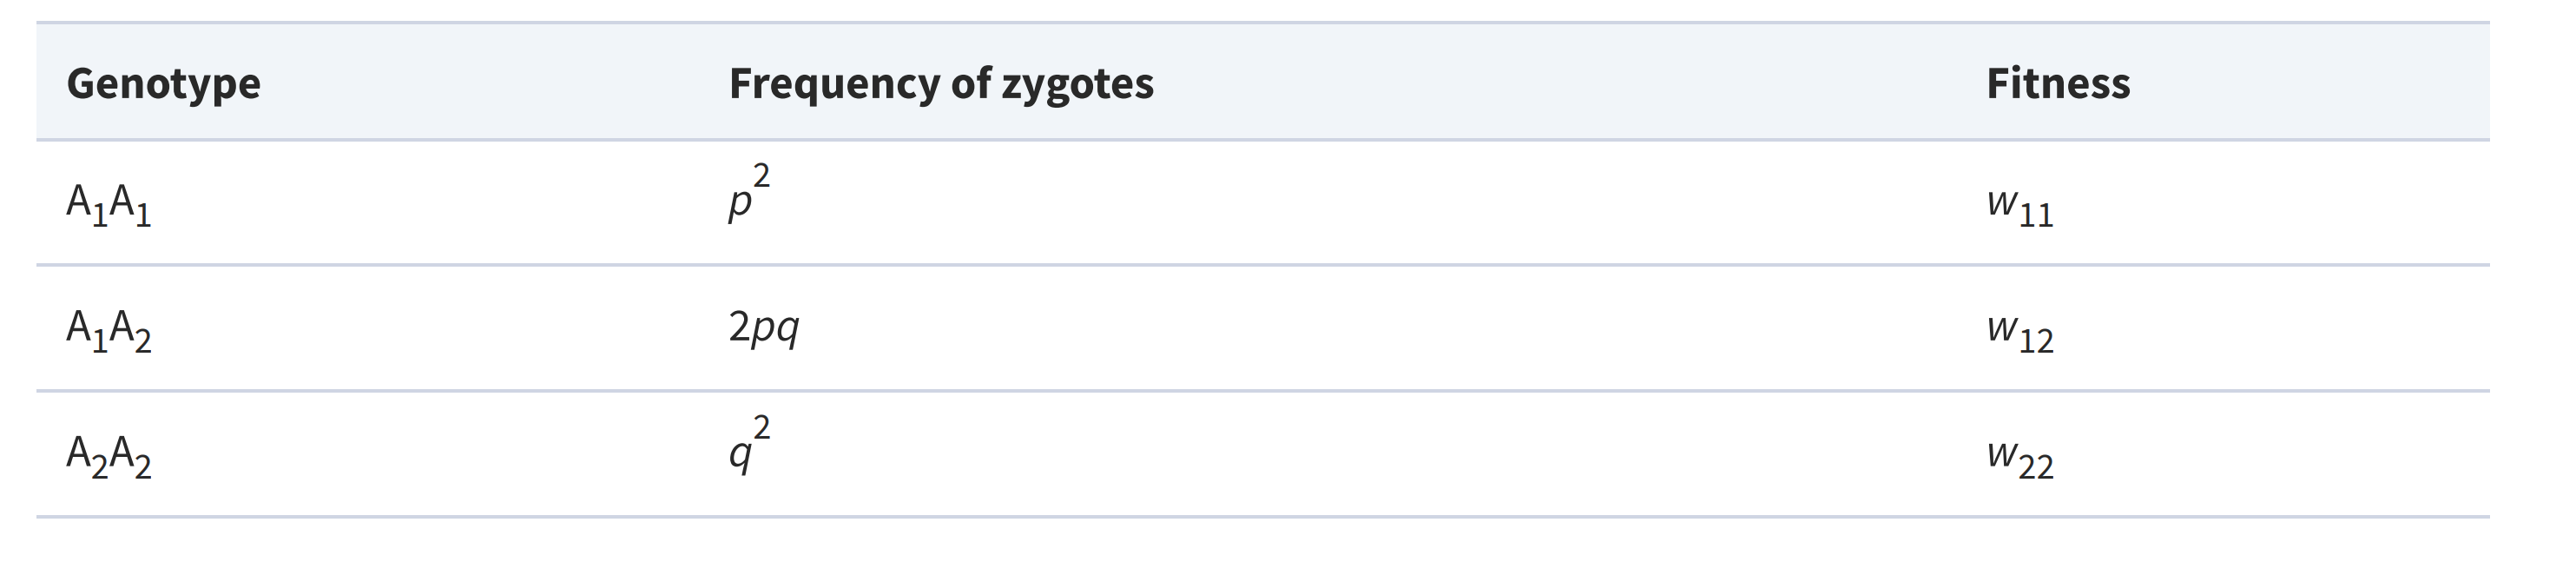



En nuestro modelo, calcularemos p$_t$$_+$$_1$, la frecuencia del alelo A$_1$ tras una sola generación de selección. Esto depende de tres factores: 𝑝, la frecuencia del alelo antes de la selección; 𝛚$^{*}$$_1$, el fitness marginal del alelo A$_1$;

y la diferencia entre esta y w̄, el fitness medio de la población. Por lo tanto, nuestro modelo es básicamente:

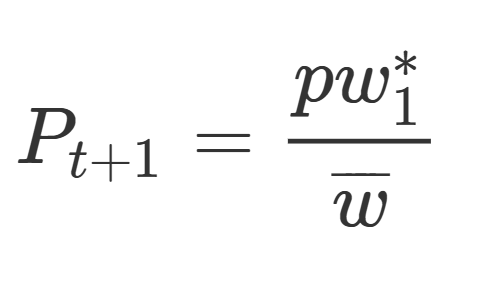

In [ ]:
## Utilizaremos nuestros resultados anteriores para calcular cómo cambia p después de una ronda de selección:
p_t <- (p*w1)/w_bar

In [ ]:
## Si comparas p y p_t, verás cómo cambió la frecuencia en p como resultado de la selección. De hecho, esto es Δp:
delta_p <- p_t - p
cat(delta_p)

0.0372093

## Simulando selección bajo el modelo de un locus
Hasta ahora, hemos recreado el modelo para una sola generación con el fin de comprender su funcionamiento. Ahora modificaremos los parámetros para observar cómo esto afecta la frecuencia del alelo dado. La forma más sencilla de hacerlo es escribir una función que resuma de forma concisa el código que ya hemos explorado; así, para ver el efecto de los parámetros, solo tendremos que modificar los argumentos que le damos a la función.

Ahora escribiremos una función que reciba la frecuencia inicial de 𝘱 y un vector que represente el fitness relativo de cada genotipo. Esta función calculará las frecuencias alélicas, el fitness poblacional medio y el fitness marginal de los alelos

In [ ]:
# Una función simple para demostrar el modelo de selección de un locus
selection_model <- function(p, rel_fit){

# definimos q
q <- 1 - p

# calculamos las frecuencias genotípicas (bajo equilibrio de Hardy-Weinberg)
gf <- c(p^2, 2*(p*q), q^2)

# calculamos el fitness poblacional media
w_bar <- sum(rel_fit*gf)

# calcula las frecuencias alélicas marginales
w1 <- (p*rel_fit[1]) + (q*rel_fit[2])

w2 <- (p*rel_fit[2]) + (q*rel_fit[3])

# calcula la frecuencia de p en la siguiente generación
p_t <- (p*w1)/w_bar

# devuelve los resultados

return(p_t)
}

Con esta sencilla función, podemos jugar con la frecuencia inicial del alelo A$_1$ y el fitness relativo de los 3 genotipos. Prueba con diferentes valores para comprobarlo.

In [ ]:
# mantenemos la freq inicial constante
selection_model(p = 0.5, rel_fit = c(1, 1, 0.75))
selection_model(p = 0.5, rel_fit = c(1, 1, 0.5))
selection_model(p = 0.5, rel_fit = c(1, 1, 0.3))

[1] 0.5333333

[1] 0.5714286

[1] 0.6060606

Para comprender mejor el funcionamiento del modelo, lo que realmente nos interesa es examinar su variación de frecuencia a lo largo del tiempo. Podemos hacerlo fácilmente utilizando las técnicas de vectorización. Inicializaremos dos valores: la frecuencia inicial 𝑝 y el número de generaciones para las que queremos simular la selección, `n_gen`.

In [ ]:
# primero inicializamos los valores
p <- p_init <- 0.5
n_gen <- 100

# usamos sapply para correr repetidamente el modelo
p_vec <- sapply(1:n_gen, function(y){
  p_t <- selection_model(p = p, rel_fit = c(1, 1, 0.75))
  p <<- p_t
})

# combinamos el valor inicial de p y los valores de p a lo largo de cada generación
p_vec <- c(p_init, p_vec)

Lo que hicimos aquí fue envolver nuestra función `selection_model` en un comando `sapply`. También aprovechamos para combinar el valor inicial de `p` (`p_init`) con la salida de `p_vec`. Noten que que usamos la notación `<<-`, que simplemente le indica a R que actualice repetidamente el valor de `p` dentro de nuestra función. Por qué hacemos esto? Para comprobarlo, puedes ejecutar la siguiente versión de `selection_model` envuelta en `sapply`.

In [ ]:
# primero inicializamos los valores
p <- 0.5
n_gen <- 100

# usamos sapply para correr el modelo repetidamente
sapply(1:n_gen, function(y){
  selection_model(p = p, rel_fit = c(1, 1, 0.75))
})


[1] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
  [8] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [15] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [22] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [29] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [36] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [43] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [50] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [57] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [64] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [71] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [78] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [85] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [92] 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333 0.5333333
 [99] 0.5333333 0.5333333

En el bloque de código anterior no hay ninguna asignación (a propósito, para evitar sobrescribir `p_vec` en los siguientes bloques), pero la salida lo deja claro: lo único que hicimos fue volver a ejecutar el modelo de selección 100 veces. Necesitamos actualizar `p`, de lo contrario no estaremos simulando la selección correctamente.

## Visualización de la selección con diferentes parámetros
Combinemos nuestros conocimientos de programación y visualización para demostrar cómo la variación de los parámetros afecta el resultado de nuestro modelo.

Para empezar, tomaremos nuestra simulación vectorizada de la sección anterior y la convertiremos en una función independiente llamada `selection_sim`.

In [ ]:
## la olvemos una función
selection_sim <- function(p, rel_fit, n_gen){
  # initializamos las variables
  p_init <- p
  my_rel_fit <- rel_fit

  # usamos sapply para repetidamente correr el modelo de selección
  p_vec <- sapply(1:n_gen, function(y){
    p_t <- selection_model(p = p, rel_fit = my_rel_fit)
    p <<- p_t
  })

  # combinamos el p  inicial los valores de p a lo largo de cada generación
  p_vec <- c(p_init, p_vec)

  # return the output
  return(p_vec)
}

Para distinguir entre los argumentos `rel_fit` utilizados en las funciones `selection_sim` y `selection_model`, lo renombramos como `my_rel_fit` dentro de la función.

Ahora podemos fácilmente simular selección a través de múltiples generaciones

In [ ]:
# Testeamos la simulación de selección
selection_sim(p = 0.5, rel_fit = c(1, 1, 0.75), n_gen = 1000)

[1] 0.5000000 0.5333333 0.5640423 0.5921796 0.6178702 0.6412807 0.6625963
   [8] 0.6820065 0.6996947 0.7158338 0.7305825 0.7440850 0.7564708 0.7678555
  [15] 0.7783419 0.7880212 0.7969742 0.8052725 0.8129793 0.8201508 0.8268370
  [22] 0.8330821 0.8389255 0.8444025 0.8495445 0.8543796 0.8589331 0.8632276
  [29] 0.8672836 0.8711195 0.8747520 0.8781961 0.8814655 0.8845726 0.8875289
  [36] 0.8903445 0.8930290 0.8955911 0.8980385 0.9003786 0.9026181 0.9047631
  [43] 0.9068193 0.9087920 0.9106860 0.9125058 0.9142555 0.9159390 0.9175599
  [50] 0.9191216 0.9206271 0.9220794 0.9234812 0.9248349 0.9261430 0.9274078
  [57] 0.9286312 0.9298152 0.9309616 0.9320723 0.9331487 0.9341924 0.9352049
  [64] 0.9361876 0.9371416 0.9380682 0.9389686 0.9398438 0.9406948 0.9415227
  [71] 0.9423282 0.9431125 0.9438761 0.9446200 0.9453448 0.9460513 0.9467402
  [78] 0.9474120 0.9480675 0.9487072 0.9493316 0.9499413 0.9505367 0.9511185
  [85] 0.9516870 0.9522427 0.9527859 0.9533172 0.9538369 0.9543453 0.9548429
  [92] 0.9553299 0.9558067 0.9562736 0.9567309 0.9571789 0.9576179 0.9580481
  [99] 0.9584699 0.9588833 0.9592888 0.9596864 0.9600765 0.9604592 0.9608348
 [106] 0.9612034 0.9615652 0.9619204 0.9622693 0.9626119 0.9629484 0.9632790
 [113] 0.9636038 0.9639230 0.9642368 0.9645452 0.9648484 0.9651466 0.9654398
 [120] 0.9657281 0.9660118 0.9662909 0.9665654 0.9668356 0.9671016 0.9673633
 [127] 0.9676210 0.9678746 0.9681244 0.9683704 0.9686127 0.9688513 0.9690864
 [134] 0.9693179 0.9695461 0.9697710 0.9699926 0.9702110 0.9704262 0.9706385
 [141] 0.9708477 0.9710540 0.9712575 0.9714581 0.9716560 0.9718512 0.9720438
 [148] 0.9722337 0.9724211 0.9726061 0.9727886 0.9729687 0.9731465 0.9733219
 [155] 0.9734951 0.9736661 0.9738350 0.9740017 0.9741663 0.9743289 0.9744894
 [162] 0.9746480 0.9748046 0.9749593 0.9751122 0.9752632 0.9754124 0.9755599
 [169] 0.9757056 0.9758496 0.9759919 0.9761325 0.9762716 0.9764090 0.9765449
 [176] 0.9766792 0.9768120 0.9769433 0.9770732 0.9772016 0.9773286 0.9774542
 [183] 0.9775784 0.9777013 0.9778229 0.9779431 0.9780621 0.9781798 0.9782962
 [190] 0.9784114 0.9785254 0.9786383 0.9787499 0.9788604 0.9789698 0.9790781
 [197] 0.9791852 0.9792913 0.9793963 0.9795002 0.9796032 0.9797051 0.9798059
 [204] 0.9799058 0.9800048 0.9801027 0.9801997 0.9802958 0.9803910 0.9804852
 [211] 0.9805786 0.9806711 0.9807627 0.9808534 0.9809433 0.9810324 0.9811206
 [218] 0.9812081 0.9812947 0.9813806 0.9814656 0.9815499 0.9816334 0.9817162
 [225] 0.9817983 0.9818796 0.9819602 0.9820401 0.9821193 0.9821978 0.9822757
 [232] 0.9823528 0.9824293 0.9825051 0.9825803 0.9826549 0.9827288 0.9828021
 [239] 0.9828747 0.9829468 0.9830183 0.9830891 0.9831594 0.9832291 0.9832983
 [246] 0.9833669 0.9834349 0.9835024 0.9835693 0.9836357 0.9837015 0.9837669
 [253] 0.9838317 0.9838960 0.9839598 0.9840231 0.9840859 0.9841482 0.9842100
 [260] 0.9842714 0.9843322 0.9843926 0.9844526 0.9845121 0.9845711 0.9846297
 [267] 0.9846879 0.9847456 0.9848029 0.9848598 0.9849162 0.9849722 0.9850278
 [274] 0.9850830 0.9851378 0.9851923 0.9852463 0.9852999 0.9853531 0.9854060
 [281] 0.9854584 0.9855105 0.9855623 0.9856136 0.9856646 0.9857153 0.9857656
 [288] 0.9858155 0.9858651 0.9859143 0.9859632 0.9860118 0.9860600 0.9861079
 [295] 0.9861555 0.9862028 0.9862497 0.9862963 0.9863426 0.9863886 0.9864343
 [302] 0.9864797 0.9865248 0.9865696 0.9866141 0.9866583 0.9867022 0.9867458
 [309] 0.9867891 0.9868322 0.9868750 0.9869175 0.9869597 0.9870017 0.9870434
 [316] 0.9870848 0.9871259 0.9871668 0.9872075 0.9872479 0.9872880 0.9873279
 [323] 0.9873675 0.9874069 0.9874461 0.9874850 0.9875237 0.9875621 0.9876003
 [330] 0.9876383 0.9876760 0.9877135 0.9877508 0.9877878 0.9878246 0.9878613
 [337] 0.9878977 0.9879338 0.9879698 0.9880055 0.9880411 0.9880764 0.9881115
 [344] 0.9881464 0.9881811 0.9882157 0.9882500 0.9882841 0.9883180 0.9883517
 [351] 0.9883852 0.9884186 0.9884517 0.9884847 0.9885174 0.9885500 0.9885824
 [358] 0.9886147 0.9886467 0.9886785 0.9887102 0.9887417 0.9887731 0.9888042

Ahora realizaremos 4 simulaciones durante 200 generaciones, manteniendo la frecuencia inicial de 𝑝 en 0,5. Sin embargo, modificaremos la aptitud relativa del genotipo A$_2$A$_2$ de 0,2 a 0,8. Esto también se puede hacer fácilmente mediante vectorización.

In [ ]:
# setear el vector del fitness relativo de A2A2
A2A2_rf <- seq(from = 0.2, to = 0.8, by = 0.2)

# correr simulaciones para cada uno
sel_sims <- sapply(A2A2_rf, function(z){
  selection_sim(p = 0.5, rel_fit = c(1, 1, z), n_gen = 200)
}, simplify = "array") # Use simplify = "array" to keep structure for renaming

# darles nombres a las matrices
colnames(sel_sims) <- paste0("w22=", A2A2_rf)

lo último que hicimos fue usar `paste0` para crear nombres de columna para nuestra matriz de simulaciones de selección. Usamos `paste0` para combinar `w22=` con el valor de aptitud relativa para el genotipo A$_2$A$_2$

Esto tendrá sentido más adelante, cuando lo usemos en nuestros gráficos. A continuación, debemos reunir todo en un `tibble` y usar `gather` para prepararlo para la representación gráfica.

In [ ]:
# creamos un vector de generaciones
g <- seq(0, 200, 1)

# los combinamos juntos para crear un tibble
sel_sims <- as_tibble(cbind(Generation = g, sel_sims))

In [ ]:
# usamos gather para preparar los datos para ggplot
sel_sims_g <- sel_sims %>%
  gather(key = "Fitness_A2A2", value = "Allele_Frequency", -Generation)

# Mostramos las primeras filas del tibble resultante
print(sel_sims_g)

# A tibble: 804 × 3
   Generation Fitness_A2A2 Allele_Frequency
        <dbl> <chr>                   <dbl>
 1          0 w22=0.2                 0.5  
 2          1 w22=0.2                 0.625
 3          2 w22=0.2                 0.704
 4          3 w22=0.2                 0.757
 5          4 w22=0.2                 0.795
 6          5 w22=0.2                 0.822
 7          6 w22=0.2                 0.844
 8          7 w22=0.2                 0.861
 9          8 w22=0.2                 0.874
10          9 w22=0.2                 0.885
# ℹ 794 more rows


Para aclarar lo que hicimos, usamos `gather` para reorganizar nuestro tibble de manera que cada valor de `g` tenga una fila para los diferentes valores de `rel_fit`. Esto facilita mucho graficar los diferentes cambios en la frecuencia de los alelos a lo largo del tiempo usando ggplot2:

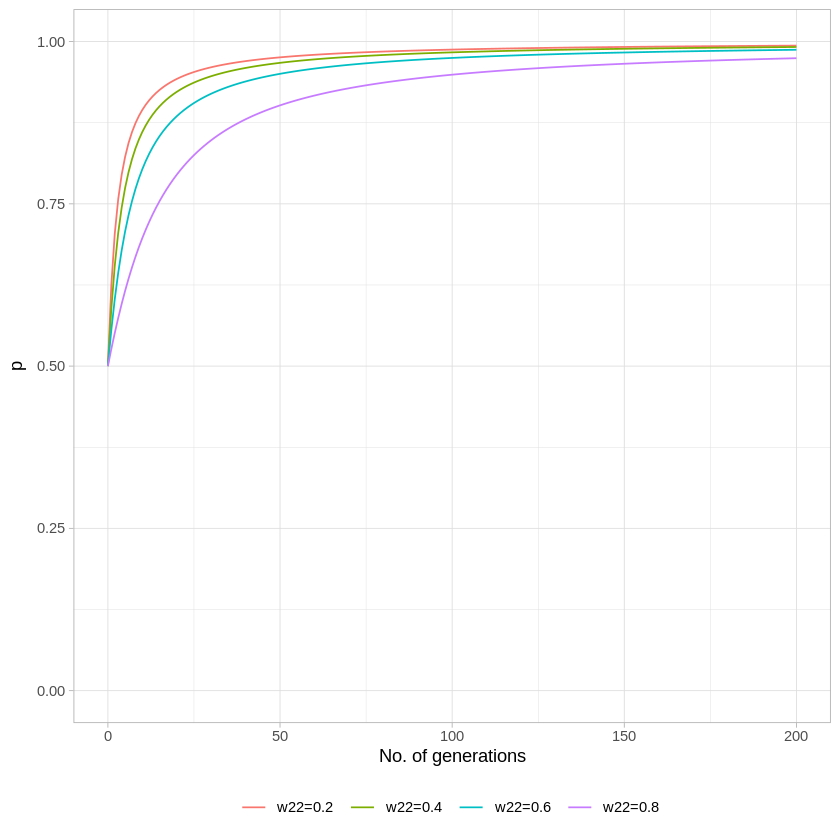

In [ ]:
# initialise plot
a <- ggplot(sel_sims_g, aes(x = Generation, y = Allele_Frequency, colour = Fitness_A2A2)) +
  geom_line()

a <- a + xlab("No. of generations") + ylab("p") + ylim(0, 1)
a + theme_light() + theme(legend.position = "bottom", legend.title = element_blank())

Del gráfico, a medida que disminuye la diferencia entre el fitness marginal de A$_1$ y el fitness medio de la población `w¯`, el aumento proporcional de la frecuencia alélica por generación se ralentiza. Dicho de otro modo, cuando `w22` es igual a 0,8, el aumento de 𝑝 por generación es menor que cuando `w22` es igual a 0,2.